In [1]:
# You have 2 options:
# Option A: Download manually from 
#   https://www.kaggle.com/datasets/mirichoi0218/insurance
#   Then save as 'insurance.csv' in your working directory

# Option B: Use Kaggle API (if installed)
# !pip install kaggle
# !kaggle datasets download -d mirichoi0218/insurance


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load dataset
df = pd.read_csv('insurance.csv')

# Basic exploration
print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:\n{df.head()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nBasic statistics:\n{df.describe()}")
print(f"\nTarget variable (charges) distribution:")
print(df['charges'].describe())

# Check for missing values
print(f"\nMissing values:\n{df.isnull().sum()}")


Dataset shape: (1338, 7)

First 5 rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Data types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Basic statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     

C:\Users\akash\AppData\Local\Temp\ipykernel_40560\2851387090.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([df[df['smoker'] == 'no']['charges'],


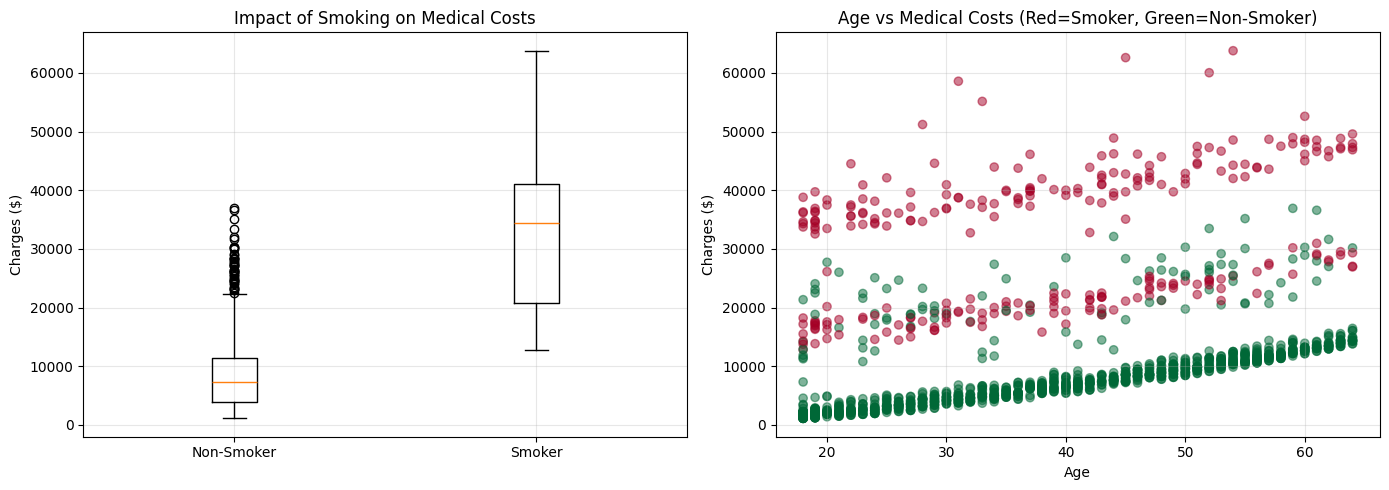


Average charges - Smokers: $32,050
Average charges - Non-Smokers: $8,434
Smokers cost 280% more


In [3]:
# Smoking impact (strongest predictor)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot: Smoker vs Charges
axes[0].boxplot([df[df['smoker'] == 'no']['charges'], 
                  df[df['smoker'] == 'yes']['charges']], 
                labels=['Non-Smoker', 'Smoker'])
axes[0].set_ylabel('Charges ($)')
axes[0].set_title('Impact of Smoking on Medical Costs')
axes[0].grid(True, alpha=0.3)

# Age vs Charges
axes[1].scatter(df['age'], df['charges'], alpha=0.5, c=df['smoker'].map({'no': 0, 'yes': 1}), cmap='RdYlGn_r')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Charges ($)')
axes[1].set_title('Age vs Medical Costs (Red=Smoker, Green=Non-Smoker)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Quick insight
smoker_avg = df[df['smoker'] == 'yes']['charges'].mean()
non_smoker_avg = df[df['smoker'] == 'no']['charges'].mean()
print(f"\nAverage charges - Smokers: ${smoker_avg:,.0f}")
print(f"Average charges - Non-Smokers: ${non_smoker_avg:,.0f}")
print(f"Smokers cost {(smoker_avg / non_smoker_avg - 1) * 100:.0f}% more")


In [4]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

print("Encoded columns:", df_encoded.columns.tolist())
print("\nData after encoding:")
print(df_encoded.head())

# Separate X and y
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Encoded columns: ['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']

Data after encoding:
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  

Training set size: (1070, 8)
Test set size: (268, 8)


In [5]:
# Simple model: only smoking status
X_train_simple = X_train[['smoker_yes']]
X_test_simple = X_test[['smoker_yes']]

model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train)

y_pred_simple = model_simple.predict(X_test_simple)

# Evaluate
r2_simple = r2_score(y_test, y_pred_simple)
mae_simple = mean_absolute_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mean_squared_error(y_test, y_pred_simple))

print("=" * 50)
print("MODEL 1: SIMPLE LINEAR REGRESSION (Smoker Only)")
print("=" * 50)
print(f"Coefficient (Smoker): ${model_simple.coef_[0]:,.2f}")
print(f"Intercept (Base Cost): ${model_simple.intercept_:,.2f}")
print(f"\nPerformance:")
print(f"  R² = {r2_simple:.4f}")
print(f"  MAE = ${mae_simple:,.0f}")
print(f"  RMSE = ${rmse_simple:,.0f}")
print(f"\nInterpretation:")
print(f"  Being a smoker adds ${model_simple.coef_[0]:,.0f} to annual medical costs")


MODEL 1: SIMPLE LINEAR REGRESSION (Smoker Only)
Coefficient (Smoker): $23,188.69
Intercept (Base Cost): $8,578.32

Performance:
  R² = 0.6602
  MAE = $5,626
  RMSE = $7,263

Interpretation:
  Being a smoker adds $23,189 to annual medical costs


In [6]:
# Multiple model: all features
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

y_pred_multiple = model_multiple.predict(X_test)

# Evaluate
r2_multiple = r2_score(y_test, y_pred_multiple)
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)
rmse_multiple = np.sqrt(mean_squared_error(y_test, y_pred_multiple))

print("\n" + "=" * 50)
print("MODEL 2: MULTIPLE LINEAR REGRESSION (All Features)")
print("=" * 50)
print(f"\nCoefficients:")
for feature, coef in zip(X_train.columns, model_multiple.coef_):
    print(f"  {feature}: ${coef:,.2f}")
print(f"  Intercept: ${model_multiple.intercept_:,.2f}")

print(f"\nPerformance:")
print(f"  R² = {r2_multiple:.4f}")
print(f"  MAE = ${mae_multiple:,.0f}")
print(f"  RMSE = ${rmse_multiple:,.0f}")

print(f"\nImprovement over simple model:")
print(f"  R² improved by {(r2_multiple - r2_simple)*100:.2f}%")



MODEL 2: MULTIPLE LINEAR REGRESSION (All Features)

Coefficients:
  age: $256.98
  bmi: $337.09
  children: $425.28
  sex_male: $-18.59
  smoker_yes: $23,651.13
  region_northwest: $-370.68
  region_southeast: $-657.86
  region_southwest: $-809.80
  Intercept: $-11,931.22

Performance:
  R² = 0.7836
  MAE = $4,181
  RMSE = $5,796

Improvement over simple model:
  R² improved by 12.33%


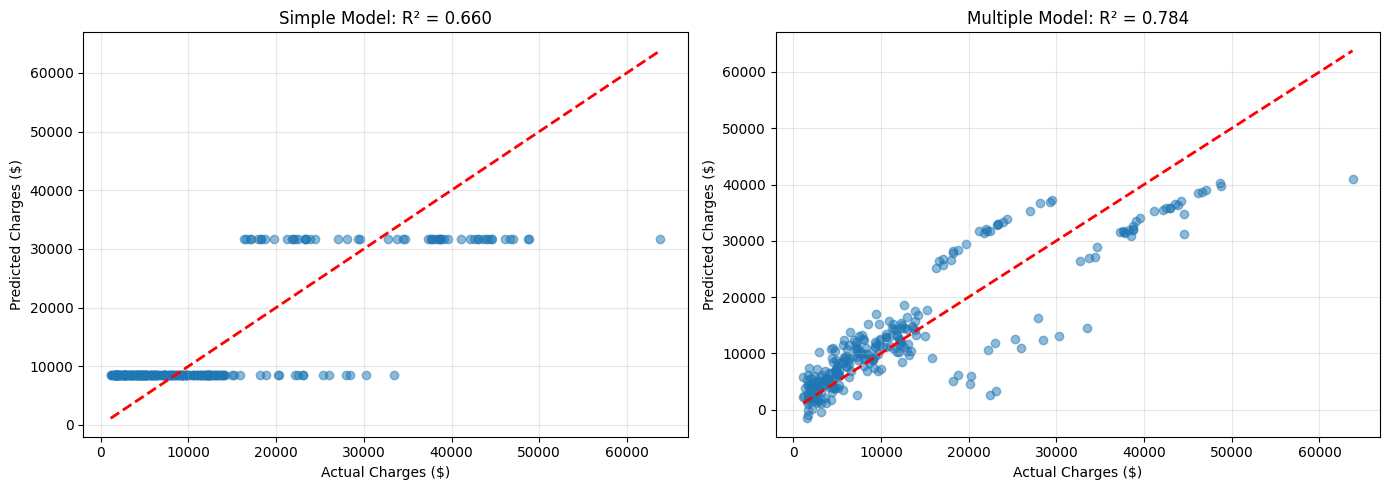

In [7]:
# Predicted vs Actual
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Simple model
axes[0].scatter(y_test, y_pred_simple, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Charges ($)')
axes[0].set_ylabel('Predicted Charges ($)')
axes[0].set_title(f'Simple Model: R² = {r2_simple:.3f}')
axes[0].grid(True, alpha=0.3)

# Multiple model
axes[1].scatter(y_test, y_pred_multiple, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Charges ($)')
axes[1].set_ylabel('Predicted Charges ($)')
axes[1].set_title(f'Multiple Model: R² = {r2_multiple:.3f}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
